# YouTube Sentiment-Analysis

With the prevalance of public opinion, content creators use their viewers' sentiment to make decisions on major social media platform bringing an ideal resource for sentiment analysis. By improving the technique, the efficiency of social monitoring and brand marketing are enhanced.

## Methodology

1. Import relevant libraries and packages
2. Collect large experimental data
3. Data visualization
4. Data preprocessing
5. Model training
6. Prediction

### Import relevant libraries

In [34]:
import os
import time

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from textblob import TextBlob
from wordcloud import WordCloud , STOPWORDS
from collections import Counter
import string
import emoji

import plotly.graph_objs as go
from plotly.offline import iplot

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *

from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import brier_score_loss
from sklearn.metrics import roc_curve

import shap

%matplotlib inline
shap.initjs()

## Reading Training Dataframe

In [2]:
path = './School/CS583/'
df = pd.read_csv(path + 'Data/archive-2/comments.csv', on_bad_lines = 'skip', low_memory = False)

df.head(10)

Id  \
0  UgzjBHh7ILJUvLgzZy54AaABAg   
1  UgzJbHin_YFKdV7RNP94AaABAg   
2  UgzJBhKYPm6knayVM1l4AaABAg   
3  UgzJBHlz0MNfuRxasYx4AaABAg   
4  UgzjbHyggliWw2coU1h4AaABAg   
5  UgzJBx4-wquqQQWCtEB4AaABAg   
6  UgzJbX6O32YMy5JAWUl4AaABAg   
7  Ugz-JbXFJziJEvp6KVd4AaABAg   
8  Ugw1-ZqR6FHASuY0cmt4AaABAg   
9  Ugw1ZQzdCv5g_QNFNqV4AaABAg   

                                                Text         AuthorName  \
0      Аллах сахласын машаллах аталы аналы бойусун 🙏      Хабиб Рзазаде   
1                                       Best talent.         Amjad Khan   
2  I always knew there was a reason I’ve always h...    Beverly Kennedy   
3                                  Rujun rengi nedir         Beyza Özen   
4                                               5:28        Mohna Zaidi   
5  No wonder why the CR show didn't last. Carlin ...  K. Pádraig O'Kane   
6  I wanna know why you never show your true self...     Hailey Cameros   
7                                             💚💜💛💚💜💛   Ghaphlan Khaligh   
8                                             IQ 82               Kuyoh   
9  Kasetini radyoda sarıp sarıp dinlerdim 10 yaşı...    ahmet nuri avcı   

            AuthorChannelId  PublishedTime  LikeCount      VideoId  \
0  UC2ppCYMuuRGEBXXJ1hnhisQ     1 ay əvvəl          2  WPBEj-NM_M8   
1  UC0v7N2GuJLZonpqQvCHVQmw     3 ay əvvəl          9  Ng1rwl1EwiI   
2  UCa_Du5YjV_5m_56vDUenwmQ     4 ay əvvəl          0  I75qa0kTeY4   
3  UCjnKTAwwtrB6O95YyNgTJ3A  20 saat əvvəl          0  i_Il1WN7G3Y   
4  UChNcefiPX3qu5X6QdkGShdA     4 ay əvvəl          1  0D2o8F2MOuI   
5  UCNbnKFaHnNsw_T9_BNpqgtg     7 ay əvvəl          0  Gw1ImiSR6Eg   
6  UCQqRhgWPIDXOFocW798A0ug     6 ay əvvəl          6  frKkuDsrQco   
7  UC5qpK8RV882s3J1aCI0umig     7 ay əvvəl          1  WtRhw7Rfwgo   
8  UCG1jPo2Yb8sFGe_NHqIKsTw  4 həftə əvvəl          1  8Tk8n_MO_AU   
9  UCDPYDEfgbVYxJ8njuH4PZeA  3 həftə əvvəl          4  4CrlqHH3-As   

                  GrabDate  
0  2019-11-17 14:00:00.000  
1  2019-11-17 14:00:00.000  
2  2019-11-22 09:45:43.243  
3  2019-11-17 07:25:52.160  
4  2019-11-22 09:00:03.193  
5  2019-11-17 14:00:00.000  
6  2019-11-22 05:51:45.710  
7  2019-11-13 23:45:09.507  
8  2019-11-13 23:10:14.740  
9  2019-11-13 22:19:29.670

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1264035 entries, 0 to 1264034
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   Id               1264035 non-null  object
 1   Text             1263804 non-null  object
 2   AuthorName       1264008 non-null  object
 3   AuthorChannelId  1264011 non-null  object
 4   PublishedTime    1264035 non-null  object
 5   LikeCount        1264035 non-null  int64 
 6   VideoId          1264035 non-null  object
 7   GrabDate         1264035 non-null  object
dtypes: int64(1), object(7)
memory usage: 77.2+ MB


In [4]:
df.describe(include = 'all')

Id  \
count                      1264035   
unique                     1264035   
top     UgzjBHh7ILJUvLgzZy54AaABAg   
freq                             1   
mean                           NaN   
std                            NaN   
min                            NaN   
25%                            NaN   
50%                            NaN   
75%                            NaN   
max                            NaN   

                                                    Text          AuthorName  \
count                                            1263804             1264008   
unique                                           1166054             1011340   
top     :D oha aleyna tilkinin ifşası yayınlanmış bakın   Mert Dörtkardeşler   
freq                                                1791                 767   
mean                                                 NaN                 NaN   
std                                                  NaN                 NaN   
min                                                  NaN                 NaN   
25%                                                  NaN                 NaN   
50%                                                  NaN                 NaN   
75%                                                  NaN                 NaN   
max                                                  NaN                 NaN   

                 AuthorChannelId PublishedTime     LikeCount      VideoId  \
count                    1264011       1264035  1.264035e+06      1264035   
unique                   1087788           173           NaN         4126   
top     UCjVq-_woTwHu1gjfJ21BF8A    1 il əvvəl           NaN  fsA6OYOL578   
freq                         767        280925           NaN         1633   
mean                         NaN           NaN  8.961528e+00          NaN   
std                          NaN           NaN  1.269373e+02          NaN   
min                          NaN           NaN  0.000000e+00          NaN   
25%                          NaN           NaN  0.000000e+00          NaN   
50%                          NaN           NaN  0.000000e+00          NaN   
75%                          NaN           NaN  1.000000e+00          NaN   
max                          NaN           NaN  3.481000e+04          NaN   

                       GrabDate  
count                   1264035  
unique                   339262  
top     2019-11-17 14:00:00.000  
freq                     227018  
mean                        NaN  
std                         NaN  
min                         NaN  
25%                         NaN  
50%                         NaN  
75%                         NaN  
max                         NaN

In [5]:
df.isnull().sum()

Id                   0
Text               231
AuthorName          27
AuthorChannelId     24
PublishedTime        0
LikeCount            0
VideoId              0
GrabDate             0
dtype: int64

In [6]:
# There are only a few entries with null values...
df['Text'] = df['Text'].fillna("")

## Visualization Analysis

In [7]:
def histplot_ax(subplot, field, xmin, xmax, label, title, data = df):
    ax = plt.subplot(subplot)
    sns.histplot(data[field], label = 'Text', ax = ax)
    ax.set(xlim = (xmin, xmax))
    ax.set_xlabel(label)
    ax.set_ylabel('Frequency')
    ax.set_title(title)

def boxplot_punctuations(subplot, field, xmin, xmax, label, title, data = df):
    ax = plt.subplot(subplot)
    sns.boxplot(x = data['Punctuationcount'], y = field, data = data, ax = ax)
    ax.set(xlim = (xmin, xmax))
    ax.set_xlabel('Number of Punctuations')
    ax.set_ylabel(label)
    ax.set_title(title)

In [8]:
stopwords_en = set(stopwords.words("english"))

# Word count:
df['Wordcount'] = df['Text'].apply(lambda x: len(str(x).split()))

# Unique word count
df['! Wordcount'] = df['Text'].apply(lambda x: len(set(str(x).split())))

# Word count percent per comment:
df['! Wordcount percent'] = df['! Wordcount'] * 100 / df['Wordcount']

# Punctuation count
df['Punctuationcount'] = df['Text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

# Punctuation percent in each comment:
df['Punctuation Percent'] = df['Punctuationcount'] * 100 / df['Wordcount']

# Stopwords count
df['Stopwordcount'] = df['Text'].apply(lambda x: len([w for w in str(x).lower().split() if w in stopwords_en]))


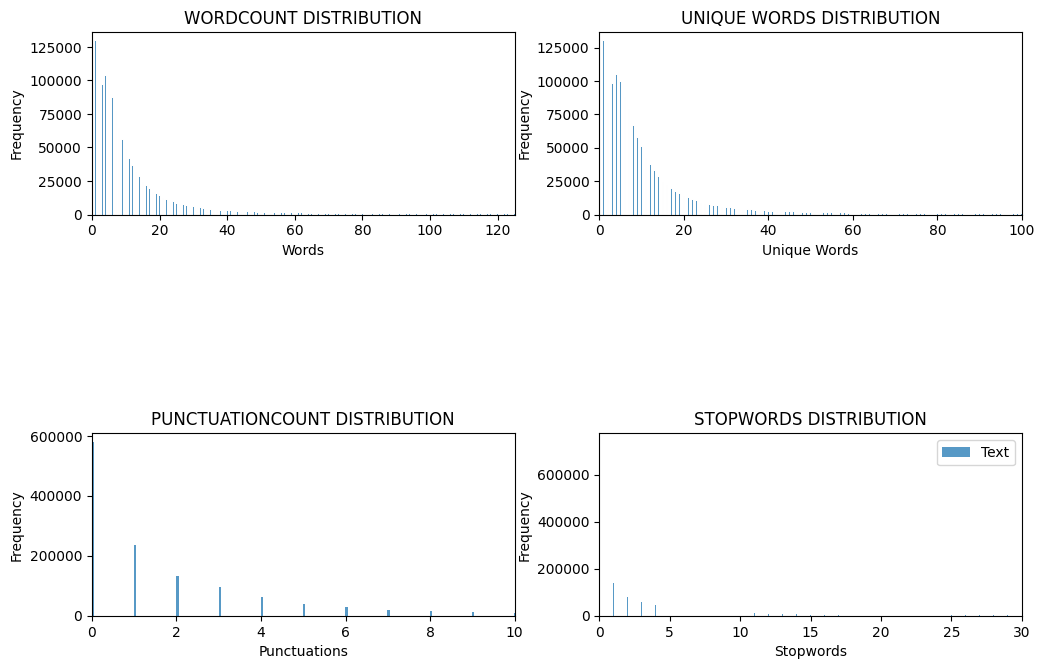

In [9]:
plt.figure(figsize = (12, 18))

histplot_ax(421, 'Wordcount', 0, 125, 'Words', 'WORDCOUNT DISTRIBUTION')
histplot_ax(422, '! Wordcount', 0, 100, 'Unique Words', 'UNIQUE WORDS DISTRIBUTION')
histplot_ax(423, 'Punctuationcount', 0, 10, 'Punctuations', 'PUNCTUATIONCOUNT DISTRIBUTION')
histplot_ax(424, 'Stopwordcount', 0, 30, 'Stopwords', 'STOPWORDS DISTRIBUTION')

plt.subplots_adjust(wspace = 0.2, hspace = 1.2)
plt.legend()
plt.show()

In [10]:
'''
plt.figure(figsize = (12, 8))

boxplot_punctuations(222, 'likes', 0, 10, 'Likes', 'Likes VS Punctuations')
boxplot_punctuations(224, 'comment_text', 0, 20, 'Comments', 'Comments VS Punctuations')

plt.subplots_adjust(wspace = 0.2, hspace = 0.4, top = 0.9)
plt.legend()
plt.show()
'''

"\nplt.figure(figsize = (12, 8))\n\nboxplot_punctuations(222, 'likes', 0, 10, 'Likes', 'Likes VS Punctuations')\nboxplot_punctuations(224, 'comment_text', 0, 20, 'Comments', 'Comments VS Punctuations')\n\nplt.subplots_adjust(wspace = 0.2, hspace = 0.4, top = 0.9)\nplt.legend()\nplt.show()\n"

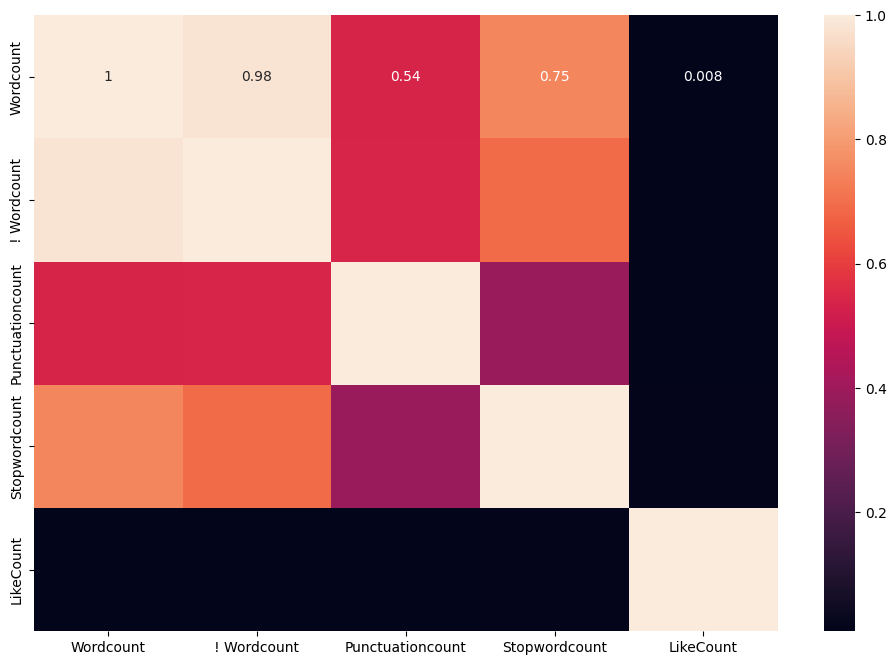

In [11]:
plt.figure(figsize = (12, 8))
sns.heatmap(df[['Wordcount', '! Wordcount', 'Punctuationcount', 'Stopwordcount', 'LikeCount', 'Text']].corr(), annot = True)
plt.show()

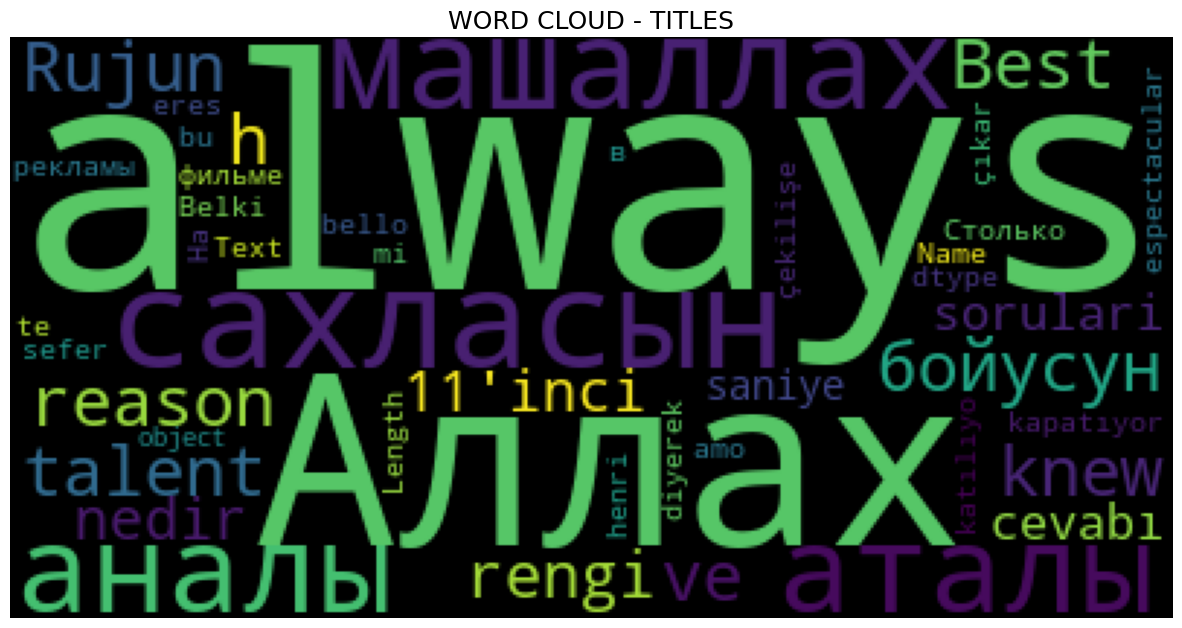

In [12]:
plt.rcParams['font.size'] = 15
plt.rcParams['savefig.dpi'] = 100
plt.rcParams['figure.subplot.bottom'] = .1

plt.figure(figsize = (15, 15))
stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'black', stopwords = stopwords, max_words = 1000, max_font_size = 120, random_state = 42).generate(str(df['Text']))
print(wordcloud)

fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - TITLES")
plt.axis('off')
plt.show()

In [13]:
emoji_list = []
for comment in df['Text']:
    for char in comment:
        if char in emoji.EMOJI_DATA:
            emoji_list.append(char)

Freq = [Counter(emoji_list).most_common(20)[i][1] for i in range(20)]
emojis = [Counter(emoji_list).most_common(20)[i][0] for i in range(20)]
len(emoji_list)

709200

In [14]:
trace = go.Bar(x = emojis, y = Freq)

iplot([trace])

## Preprocessing

In [15]:
# Removing @mentions, special characters, etc. but keeping punctuations and numbers for now as they may add to the sentiment
df['Text'] = df['Text'].str.replace("[^a-zA-Z0-9.,!?;:']", " ", regex = True)

# Replace multiple spaces with a single space
df['Text'] = df['Text'].str.replace(r'\s+', ' ', regex = True)

# Tokenization
df['Textoken'] = df['Text'].apply(lambda x: x.split())

# Lemmatization
lemmatizer = nltk.stem.WordNetLemmatizer()
df['Text'] = df['Textoken'].apply(lambda words: ' '.join([lemmatizer.lemmatize(word) for word in words]))

df.head(10)

Id  \
0  UgzjBHh7ILJUvLgzZy54AaABAg   
1  UgzJbHin_YFKdV7RNP94AaABAg   
2  UgzJBhKYPm6knayVM1l4AaABAg   
3  UgzJBHlz0MNfuRxasYx4AaABAg   
4  UgzjbHyggliWw2coU1h4AaABAg   
5  UgzJBx4-wquqQQWCtEB4AaABAg   
6  UgzJbX6O32YMy5JAWUl4AaABAg   
7  Ugz-JbXFJziJEvp6KVd4AaABAg   
8  Ugw1-ZqR6FHASuY0cmt4AaABAg   
9  Ugw1ZQzdCv5g_QNFNqV4AaABAg   

                                                Text         AuthorName  \
0                                                         Хабиб Рзазаде   
1                                       Best talent.         Amjad Khan   
2  I always knew there wa a reason I ve always ha...    Beverly Kennedy   
3                                  Rujun rengi nedir         Beyza Özen   
4                                               5:28        Mohna Zaidi   
5  No wonder why the CR show didn't last. Carlin ...  K. Pádraig O'Kane   
6  I wanna know why you never show your true self...     Hailey Cameros   
7                                                      Ghaphlan Khaligh   
8                                              IQ 82              Kuyoh   
9  Kasetini radyoda sar p sar p dinlerdim 10 ya n...    ahmet nuri avcı   

            AuthorChannelId  PublishedTime  LikeCount      VideoId  \
0  UC2ppCYMuuRGEBXXJ1hnhisQ     1 ay əvvəl          2  WPBEj-NM_M8   
1  UC0v7N2GuJLZonpqQvCHVQmw     3 ay əvvəl          9  Ng1rwl1EwiI   
2  UCa_Du5YjV_5m_56vDUenwmQ     4 ay əvvəl          0  I75qa0kTeY4   
3  UCjnKTAwwtrB6O95YyNgTJ3A  20 saat əvvəl          0  i_Il1WN7G3Y   
4  UChNcefiPX3qu5X6QdkGShdA     4 ay əvvəl          1  0D2o8F2MOuI   
5  UCNbnKFaHnNsw_T9_BNpqgtg     7 ay əvvəl          0  Gw1ImiSR6Eg   
6  UCQqRhgWPIDXOFocW798A0ug     6 ay əvvəl          6  frKkuDsrQco   
7  UC5qpK8RV882s3J1aCI0umig     7 ay əvvəl          1  WtRhw7Rfwgo   
8  UCG1jPo2Yb8sFGe_NHqIKsTw  4 həftə əvvəl          1  8Tk8n_MO_AU   
9  UCDPYDEfgbVYxJ8njuH4PZeA  3 həftə əvvəl          4  4CrlqHH3-As   

                  GrabDate  Wordcount  ! Wordcount  ! Wordcount percent  \
0  2019-11-17 14:00:00.000          7            7           100.000000   
1  2019-11-17 14:00:00.000          2            2           100.000000   
2  2019-11-22 09:45:43.243         38           33            86.842105   
3  2019-11-17 07:25:52.160          3            3           100.000000   
4  2019-11-22 09:00:03.193          1            1           100.000000   
5  2019-11-17 14:00:00.000         11           11           100.000000   
6  2019-11-22 05:51:45.710         15           14            93.333333   
7  2019-11-13 23:45:09.507          1            1           100.000000   
8  2019-11-13 23:10:14.740          2            2           100.000000   
9  2019-11-13 22:19:29.670          7            6            85.714286   

   Punctuationcount  Punctuation Percent  Stopwordcount  \
0                 0             0.000000              0   
1                 1            50.000000              0   
2                 3             7.894737             13   
3                 0             0.000000              0   
4                 1           100.000000              0   
5                 3            27.272727              5   
6                 1             6.666667              7   
7                 0             0.000000              0   
8                 0             0.000000              0   
9                 0             0.000000              0   

                                            Textoken  
0                                                 []  
1                                    [Best, talent.]  
2  [I, always, knew, there, was, a, reason, I, ve...  
3                              [Rujun, rengi, nedir]  
4                                             [5:28]  
5  [No, wonder, why, the, CR, show, didn't, last....  
6  [I, wanna, know, why, you, never, show, your, ...  
7                                                 []  
8                                           [IQ, 82]  
9  [Kasetini, radyoda, sar, p, sar, p, d

In [16]:
# Assign polarity scores to the comments with TextBlob
polarity = []
t0 = time.time()

for comment in df['Text']:
    try: polarity.append(TextBlob(comment).sentiment.polarity)
    except: polarity.append(0)

t = time.time()
df['Polarity'] = polarity

print(f"It took {t - t0} seconds")
df.head(20)

It took 171.06401991844177 seconds


Id  \
0   UgzjBHh7ILJUvLgzZy54AaABAg   
1   UgzJbHin_YFKdV7RNP94AaABAg   
2   UgzJBhKYPm6knayVM1l4AaABAg   
3   UgzJBHlz0MNfuRxasYx4AaABAg   
4   UgzjbHyggliWw2coU1h4AaABAg   
5   UgzJBx4-wquqQQWCtEB4AaABAg   
6   UgzJbX6O32YMy5JAWUl4AaABAg   
7   Ugz-JbXFJziJEvp6KVd4AaABAg   
8   Ugw1-ZqR6FHASuY0cmt4AaABAg   
9   Ugw1ZQzdCv5g_QNFNqV4AaABAg   
10  Ugw1zm8UZ0KzdAICDbt4AaABAg   
11  Ugw1zMhKEd_S0mn8BnR4AaABAg   
12  Ugw1ZN9g3AyXV5Tkv0B4AaABAg   
13  Ugw-1zn-aih6wqy-iSx4AaABAg   
14  Ugw1znLyWx__DvVzMip4AaABAg   
15  Ugz8xX_087SHxMfUGbV4AaABAg   
16  Ugz8xx613-aboSEv8Nh4AaABAg   
17  Ugz8XxFZdmvXRubyoRB4AaABAg   
18  Ugz8xxSOh0plAkPKEVJ4AaABAg   
19  Ugz8XxTD4bPw3dmP1CZ4AaABAg   

                                                 Text         AuthorName  \
0                                                          Хабиб Рзазаде   
1                                        Best talent.         Amjad Khan   
2   I always knew there wa a reason I ve always ha...    Beverly Kennedy   
3                                   Rujun rengi nedir         Beyza Özen   
4                                                5:28        Mohna Zaidi   
5   No wonder why the CR show didn't last. Carlin ...  K. Pádraig O'Kane   
6   I wanna know why you never show your true self...     Hailey Cameros   
7                                                       Ghaphlan Khaligh   
8                                               IQ 82              Kuyoh   
9   Kasetini radyoda sar p sar p dinlerdim 10 ya n...    ahmet nuri avcı   
10                                                            يوسف خالدي   
11                             anlamad m a klar m s n    Kürşat Yıldırım   
12                                     kad n ok g zel         Aa herupki   
13                Why do you want an American accent?           Eureka L   
14            Biz y lar nce face sayfalar nada yazd k        Cemil Topal   
15                      cheap for you expensive for u         Spider Man   
16                                                       الأمل سر النجاح   
17       Yaran kafasi o su maden suyu etin suyu degil           SERCAN K   
18  No s yo pero encontr a Akary parecida a la Yuq...       choi_panncii   
19  Maybe in the future we will use some reusable ...       Alice Depaul   

             AuthorChannelId  PublishedTime  LikeCount      VideoId  \
0   UC2ppCYMuuRGEBXXJ1hnhisQ     1 ay əvvəl          2  WPBEj-NM_M8   
1   UC0v7N2GuJLZonpqQvCHVQmw     3 ay əvvəl          9  Ng1rwl1EwiI   
2   UCa_Du5YjV_5m_56vDUenwmQ     4 ay əvvəl          0  I75qa0kTeY4   
3   UCjnKTAwwtrB6O95YyNgTJ3A  20 saat əvvəl          0  i_Il1WN7G3Y   
4   UChNcefiPX3qu5X6QdkGShdA     4 ay əvvəl          1  0D2o8F2MOuI   
5   UCNbnKFaHnNsw_T9_BNpqgtg     7 ay əvvəl          0  Gw1ImiSR6Eg   
6   UCQqRhgWPIDXOFocW798A0ug     6 ay əvvəl          6  frKkuDsrQco   
7   UC5qpK8RV882s3J1aCI0umig     7 ay əvvəl          1  WtRhw7Rfwgo   
8   UCG1jPo2Yb8sFGe_NHqIKsTw  4 həftə əvvəl          1  8Tk8n_MO_AU   
9   UCDPYDEfgbVYxJ8njuH4PZeA  3 həftə əvvəl          4  4CrlqHH3-As   
10  UC2k56YgH-Ht4a8_8s7M6RQg     1 ay əvvəl          1  xD0flDq9vVY   
11  UChS7rXUrMAXBpQDyiZvN1HQ     7 il əvvəl          0  D4VtTo5biq0   
12  UC2p89kuzQY2rNa6qWOk6zVA     2 il əvvəl          2  Ua5eqMr1otI   
13  UCyQDq8nrVte-xGHJeWurdzQ     4 ay əvvəl          0  pAhZeLytIk0   
14  UCo6zorUWygMH8LLNNzuhw-Q     1 ay əvvəl          0  I0GSm25ePZU   
15  UCdAT0taSlSArCglLuiB3VmQ    10 ay əvvəl          1  wF1Mp3X_g1k   
16  UCH9L9Q5HHhQgBoUG50aWHDA     1 ay əvvəl          0  xD0flDq9vVY   
17  UC4YfaoGtpJtCeY7h17ONRKA     1 il əvvəl          5  h6XDDKrrNbE   
18  UCELB8R-1BxkoeKj5Ox6KDvw    11 ay əvvəl          0  tW8B6pKCIuw   
19  UCW15vGseyNLnlhjFyNraBYA     4 ay əvvəl         20  bYh1KTfydvU   

                   GrabDate  Wordcount  ! Wordcount  ! Wordcount percent  \
0   2019-11-17 14:00:00.000          7            7           100.000000   
1   2019-11-17 14:00:00.000          2            2           100.000000

In [17]:
def wordcloudshow(comments, title):
    comment_joint = ' '.join(comments)
    wordcloud = WordCloud(stopwords = set(STOPWORDS), width = 800, height = 500, random_state = 21, max_font_size = 110).generate(comment_joint)
    plt.figure(figsize = (10, 7))
    plt.imshow(wordcloud, interpolation = "bilinear")
    plt.title(title)
    plt.axis('off')
    plt.show()


In [18]:
comments_pos = df[df['Polarity'] == 1]
comments_pos

Id  \
1        UgzJbHin_YFKdV7RNP94AaABAg   
59       UgzqEnoH3hkWcF-Qr1h4AaABAg   
127      UgzWqgY0z6P0x2RwaSx4AaABAg   
169      UgwX4zB6vvxhuiDhqR14AaABAg   
216      Ugwb2ZtemWjnyvYE4Nx4AaABAg   
...                             ...   
1263173  UgwDaR767u3n0aTCusd4AaABAg   
1263601  UgzCxwu8n3w1P-I5tPB4AaABAg   
1263713  UgwNpInBhMFCF2YnhBR4AaABAg   
1263742  Ugyi7bda3vuwbThRIkp4AaABAg   
1263978  Ugzj_eIWjnFlgZnn8rR4AaABAg   

                                                      Text        AuthorName  \
1                                             Best talent.        Amjad Khan   
59                                      So very beautiful!              C CC   
127                                        Woody is great!        Greg Bowen   
169                                               Best one   Muhammad Shaykh   
216                                            Brilliant !  Brian O'Sullivan   
...                                                    ...               ...   
1263173                                        adlichno :D    Ahmet AKÇAĞLAR   
1263601                                            Awesome         akshaya p   
1263713                            Trump is best comedian!    tchalla Mathew   
1263742   :D oha aleyna tilkinin if a n yay nlam lar bak n  maximus espanyol   
1263978  i would love to see you do this with Dave Groh...       abi gardner   

                  AuthorChannelId  PublishedTime  LikeCount      VideoId  \
1        UC0v7N2GuJLZonpqQvCHVQmw     3 ay əvvəl          9  Ng1rwl1EwiI   
59       UCaAKkBHDfO8LyTv8hSWQvaA     9 ay əvvəl          0  Fs8NpXqESy4   
127      UCbEAc7fBCCiq_XcmwhIjx8A     1 ay əvvəl          1  MbsDtwLLHcc   
169      UCmc12SwS1hhQa_64iwhLboA     9 ay əvvəl          0  vmI4LP-9a8o   
216      UCuKUNfKUBoUKa5jUqK3JDyQ     1 il əvvəl          4  4DkeNh3YCys   
...                           ...            ...        ...          ...   
1263173  UC30ZGXUzCH3G7go8_o3ZC6w    4 gün əvvəl          0  dYFYZ-g7fzA   
1263601  UCpOU1YK4hvp1q99fYUIyUnA     2 ay əvvəl          1  Cp5YC8C5WIA   
1263713  UCZE7ckvxdbN0d-_JWGKQu5w     8 ay əvvəl          0  CQYPEo4cfyk   
1263742  UC9UWPZJHAWv6KNeH-IqpMIg     1 il əvvəl          0  EMlNstwTHfU   
1263978  UCS5EoxDc1oIfWPYQ1LJOVdA  1 həftə əvvəl          0  wxpRVetn76o   

                        GrabDate  Wordcount  ! Wordcount  ! Wordcount percent  \
1        2019-11-17 14:00:00.000          2            2                100.0   
59       2019-11-22 09:22:20.040          3            3                100.0   
127      2019-11-17 10:02:12.933          3            3                100.0   
169      2019-11-17 10:02:34.147          2            2                100.0   
216      2019-11-17 14:41:17.520          2            2                100.0   
...                          ...        ...          ...                  ...   
1263173  2019-11-22 08:40:54.613          2            2                100.0   
1263601  2019-11-14 02:26:25.150          1            1                100.0   
1263713  2019-11-22 08:14:17.147          4            4                100.0   
1263742  2019-11-17 15:46:24.263          7            7                100.0   
1263978  2019-11-13 23:28:59.960         12           12                100.0   

         Punctuationcount  Punctuation Percent  Stopwordcount  \
1                       1            50.000000              0   
59                      1            33.333333              2   
127                     1            33.333333              1   
169                     0             0.000000              0   
216                     1            50.000000              0   
...                   ...                  ...            ...   
1263173                 1            50.000000              0   
1263601                 0             0.000000              0   
1263713                 1            25.000000              1   
1263742                 1            14.285714              0   
12

In [19]:
comments_neg = df[df['Polarity'] == -1]
comments_neg

Id  \
32       Ugw1_a8ef1zlVOSU1-t4AaABAg   
962      UgxZl-kVP36d5i6QfFR4AaABAg   
1181     UgxFUzeXpUOGfdW8L4F4AaABAg   
4670     Ugw3oPDnonjkBICfQLt4AaABAg   
4907           UggsePMMrBACiHgCoAEC   
...                             ...   
1261377  UgxDq0Qu1BV-_RHsdux4AaABAg   
1261610  Ugw-197qXhNNPbyaHvB4AaABAg   
1262149  UgyAI9p8Jjdy0vfEYFp4AaABAg   
1262711  UgyHHau6slWC8KQeUc94AaABAg   
1262927  UgzpiW-Ggy1prqygzbl4AaABAg   

                                                      Text  \
32                                      BLOODY HELL HARRY!   
962                                               pathetic   
1181                                       Trump is awful.   
4670     So.. No stomping evil spirits. Or salt to puri...   
4907             Hahahahahahahahahahahhahahahahahaha awful   
...                                                    ...   
1261377  Question: What doe all this disgusting food sa...   
1261610  Bezos is no role model. He is psychopathic meg...   
1262149  But it still impossible to throw ed woodward a...   
1262711  Minha orelha nunca t da cor do meu rosto! Semp...   
1262927                           What a disgusting women.   

                     AuthorName           AuthorChannelId  PublishedTime  \
32             UH OH STINKY yes  UCi5OoaSLozWMhz8JMgNkjOw     2 ay əvvəl   
962               Frenk Vortice  UCmyEse--5I9WuEjre1SLjIA     1 il əvvəl   
1181     Franklin MacGillacuddy  UC-sge49r1IqDfCzNthSODvQ     8 ay əvvəl   
4670           The Bassknuckler  UC-qYJsfGoyMAW07f6S6O7Xw     6 ay əvvəl   
4907          Christian Atienza  UCl_-JBGLy6pQEeUBRLtvMFg     3 il əvvəl   
...                         ...                       ...            ...   
1261377          Obi-Wan Kenobi  UCDA2m3XmASsuqOriRSuijxQ  1 həftə əvvəl   
1261610             Patsy Stone  UCP1mjPOvxRlruXvOokgkcmw     1 il əvvəl   
1262149           Cherry Edison  UC8cVpAzYoFRfnk9HFlKs-dw     3 ay əvvəl   
1262711    Garoto Beverly Hills  UCgTHZVDPCye52S5KbuCm89g     2 ay əvvəl   
1262927             Ray Orgeron  UC6KQ02bbtTbWRo1TNTBgCzg  2 həftə əvvəl   

         LikeCount      VideoId                 GrabDate  Wordcount  \
32               0  U5don9ACZEI  2019-11-17 08:07:37.243          3   
962              0  sRWIzZq0Ugk  2019-11-14 00:31:28.507          1   
1181             0  CQYPEo4cfyk  2019-11-22 08:14:20.613          3   
4670             0  KfTJZCDLgmM  2019-11-17 16:11:31.507         14   
4907             0  LGYBFu4RHcE  2019-11-22 08:33:02.220          3   
...            ...          ...                      ...        ...   
1261377         52  X5rZHlqIm3E  2019-11-14 01:46:18.707         12   
1261610         13  SCpgKvZB_VQ  2019-11-17 13:26:03.833         20   
1262149          1  fT6xeAw-XVY  2019-11-22 10:37:17.597         12   
1262711          0  j1tcs86M2jA  2019-11-13 23:55:17.063         16   
1262927          0  y2Gl9H3iyQw  2019-11-14 02:19:46.330          4   

         ! Wordcount  ! Wordcount percent  Punctuationcount  \
32                 3                100.0                 1   
962                1                100.0                 0   
1181               3                100.0                 1   
4670              14                100.0                 7   
4907               3                100.0                 0   
...              ...                  ...               ...   
1261377           12                100.0                 3   
1261610           19                 95.0                 4   
1262149           12                100.0                 2   
1262711           16                100.0                 2   
1262927            4                100.0                 1   

         Punctuation Percent  Stopwordcount  \
32                 33.333333              0   
962                 0.000000              0   
1181               33.333333              1   
4670               50.000000              5   
4907                0.000000              0   
...           

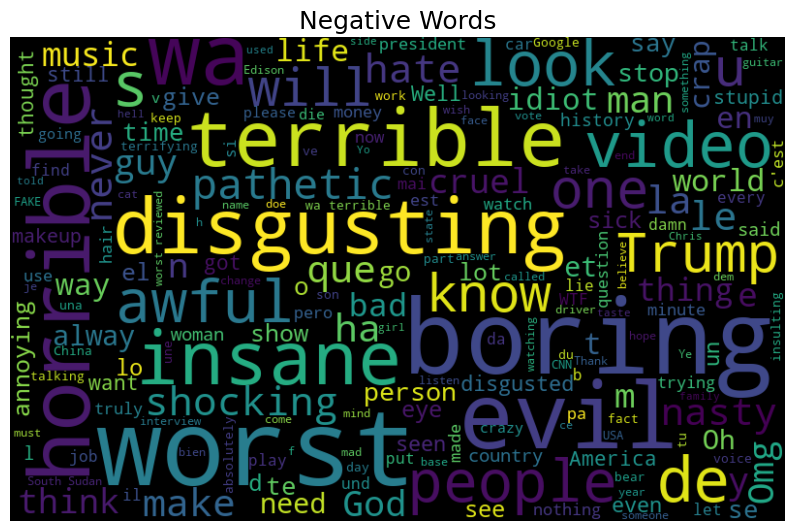

In [20]:
wordcloudshow(comments_neg['Text'], "Negative Words")

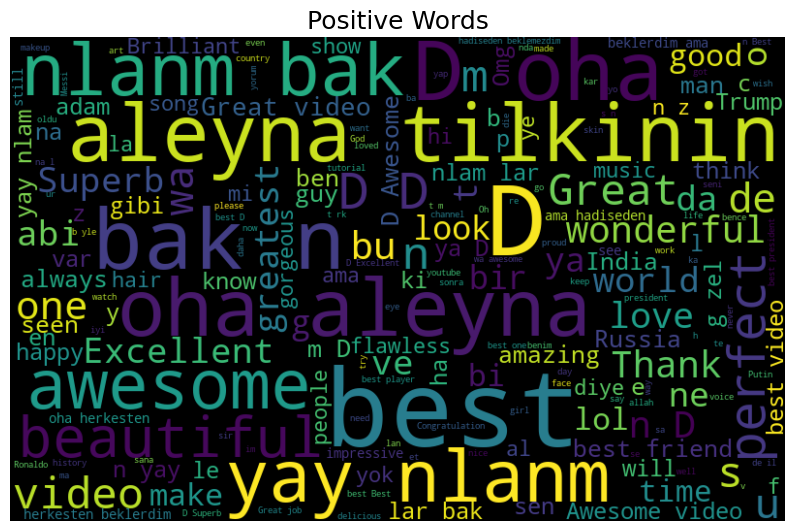

In [21]:
wordcloudshow(comments_pos['Text'], "Positive Words")

## Model Training

In [22]:
def plot_learning_curve(X_train, y_train, X_test, y_test, model):
    t0 = time.time()
    plot_learning_curves(X_train, y_train, X_test, y_test, model)
    t = time.time()
    print(f"It took {t - t0} seconds")
    plt.show()

In [329]:
# TF-IDF matrix
tfidf_vector = TfidfVectorizer(max_df = 0.1, min_df = 1, max_features = 3000, stop_words = 'english')
tf_idf = tfidf_vector.fit_transform(df['Text']) # TF-IDF feature matrix

# Splitting data into 90% training & 10% validating
XTFIDF_train, XTFIDF_test, y_train, y_test = train_test_split(tf_idf, df['Polarity'], random_state = 42, test_size = 0.1)

# Normalized polarity scores
y_train_norm = np.array((y_train + 1) / 2)
y_test_norm = np.array((y_test + 1) / 2)

# Enconde continous scores into 2 clasees: Negative or 0: (0), Positive: (1)
y_train_bin = np.where(y_train <= 0, 0, 1)
y_test_bin = np.where(y_test <= 0, 0, 1)

In [25]:
'''
# train a support vector classifier
t0 = time.time()

svc = svm.SVC(kernel = 'linear', C = 10, probability = True, decision_function_shape = 'ovo').fit(XTFIDF_train, y_train_bin)

t = time.time()

print(f"It took {t - t0} seconds")
print(svc)
'''

'\n# train a support vector classifier\nt0 = time.time()\n\nsvc = svm.SVC(kernel = \'linear\', C = 10, probability = True, decision_function_shape = \'ovo\').fit(XTFIDF_train, y_train_bin)\n\nt = time.time()\n\nprint(f"It took {t - t0} seconds")\nprint(svc)\n'

In [26]:
'''
y_, y_bin = predict_test(XTFIDF_train, svc, 0.5)
counts = Counter(y_bin)
y_neg = counts[0]
y_pos = counts[1]

print("Number of predicted negative comments:", y_neg)
print("Number of predicted positive comments:", y_pos)
'''

'\ny_, y_bin = predict_test(XTFIDF_train, svc, 0.5)\ncounts = Counter(y_bin)\ny_neg = counts[0]\ny_pos = counts[1]\n\nprint("Number of predicted negative comments:", y_neg)\nprint("Number of predicted positive comments:", y_pos)\n'

In [27]:
'''
plt.bar(["Negative"], [len(y_neg)], label = "Negative")
plt.bar(["Positive"], [len(y_pos)], label = "Positive")
plt.legend()
plt.xlabel('Type of Comment')
plt.ylabel('Count of Comment')
plt.title('Predicted Comment Count on Test Dataset')

plt.show()
'''

'\nplt.bar(["Negative"], [len(y_neg)], label = "Negative")\nplt.bar(["Positive"], [len(y_pos)], label = "Positive")\nplt.legend()\nplt.xlabel(\'Type of Comment\')\nplt.ylabel(\'Count of Comment\')\nplt.title(\'Predicted Comment Count on Test Dataset\')\n\nplt.show()\n'

In [28]:
'''
plot_learning_curve(XTFIDF_train, y_train_bin, XTFIDF_test, y_test_bin, svc)
'''

'\nplot_learning_curve(XTFIDF_train, y_train_bin, XTFIDF_test, y_test_bin, svc)\n'

In [330]:
# Train a logistic regression model
t0 = time.time()
lro = LogisticRegression(C = 1000, solver = 'saga', max_iter = 10000)
lro.fit(XTFIDF_train, y_train_bin)
t = time.time()
print(f"It took {t - t0} seconds to train the model")

y_ = lro.predict(XTFIDF_test)

It took 67.74013590812683 seconds to train the model


It took 383.7831971645355 seconds


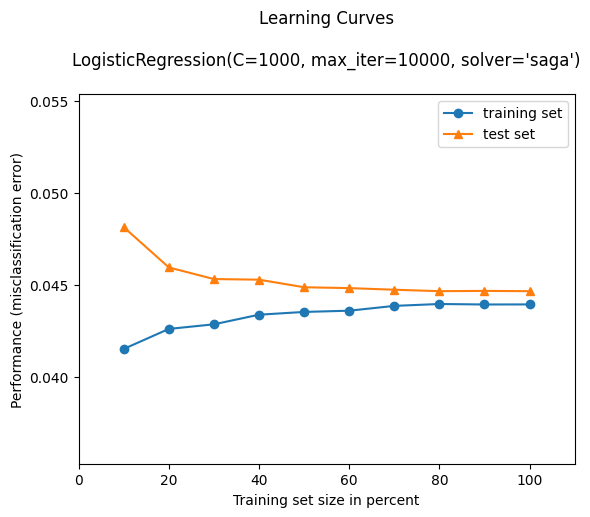

In [211]:
plot_learning_curve(XTFIDF_train, y_train_bin, XTFIDF_test, y_test_bin, lro)

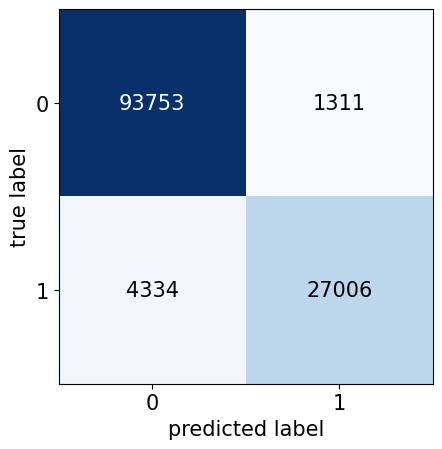

In [331]:
matrix_confussion = confusion_matrix(y_test_bin, y_)
class_names = ['Positive', 'Negative']

fig, ax = plot_confusion_matrix(conf_mat = matrix_confussion)
plt.show()

In [332]:
print(classification_report(y_test_bin, y_))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     95064
           1       0.95      0.86      0.91     31340

    accuracy                           0.96    126404
   macro avg       0.95      0.92      0.94    126404
weighted avg       0.96      0.96      0.95    126404



In [333]:
print("AUC ROC Score:", roc_auc_score(y_test_bin, y_))
print("Average precision score:", average_precision_score(y_test_bin, y_))
print("Accuracy score:", accuracy_score(y_test_bin, y_))
print("Brier score loss:", brier_score_loss(y_test_bin, y_))

precision, recall, _ = precision_recall_curve(y_test_bin, y_)

# Calculate AUC-PR
auc_pr = auc(recall, precision)
print("Area Under the Precision-Recall Curve:", auc_pr)

AUC ROC Score: 0.9239597824964431
Average precision score: 0.8561023245781706
Accuracy score: 0.9553416031138255
Brier score loss: 0.04465839688617449
Area Under the Precision-Recall Curve: 0.924849943405572


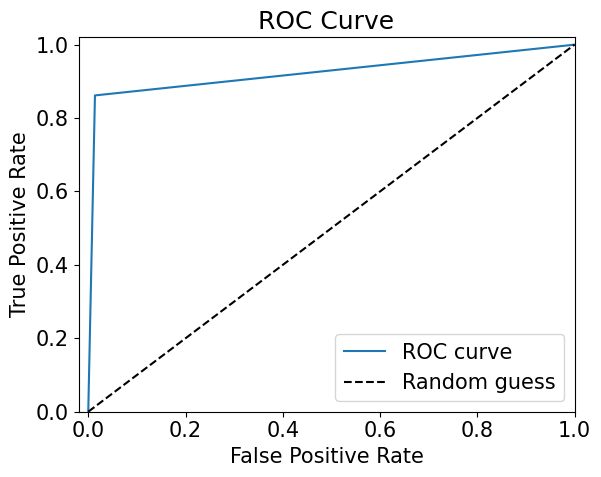

In [334]:
fpr, tpr, thresholds = roc_curve(y_test_bin, y_)

# create plot
plt.plot(fpr, tpr, label = 'ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label = 'Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc = "lower right")

plt.show()

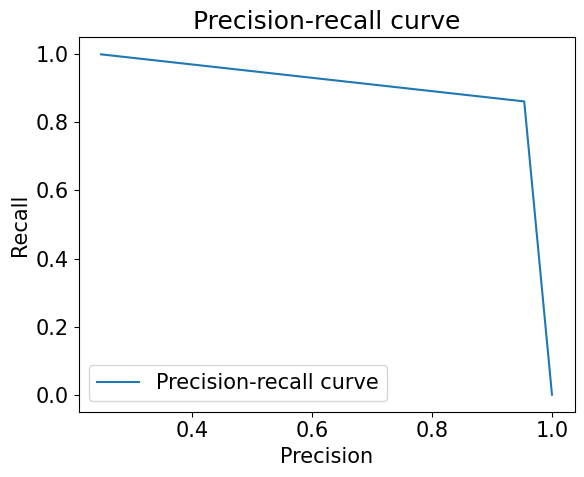

In [335]:
precision, recall, thresholds = precision_recall_curve(y_test_bin, y_)

# create plot
plt.plot(precision, recall, label = 'Precision-recall curve')
_ = plt.xlabel('Precision')
_ = plt.ylabel('Recall')
_ = plt.title('Precision-recall curve')
_ = plt.legend(loc = "lower left")

plt.show()

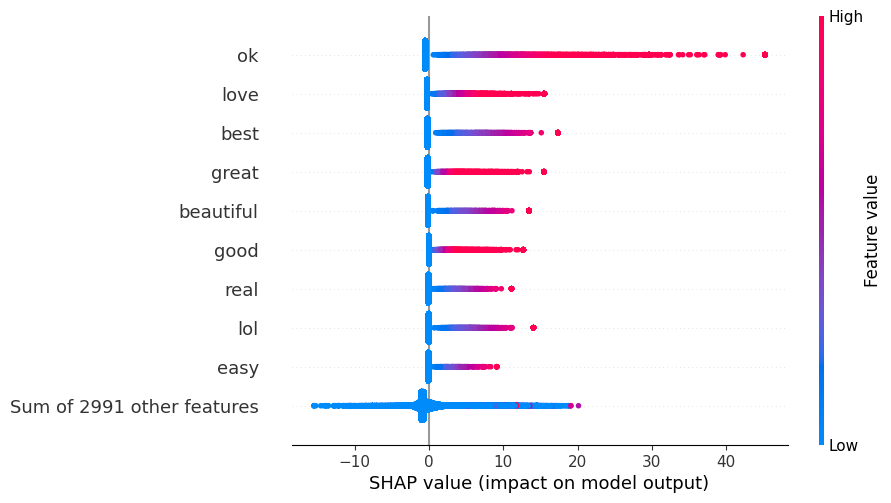

In [336]:
# Summarize the effect of all the feautres
explainer = shap.Explainer(lro, XTFIDF_train.toarray(), feature_names = tfidf_vector.get_feature_names_out())
shap_values = explainer(XTFIDF_test.toarray())
shap.plots.beeswarm(shap_values)

## Sentiment Analysis Application

In [316]:
# Predict sentiment of a text
comment = ['This is amazingly bad']
comment_string = 'This is amazingly bad'
comment_tfidf = tfidf_vector.transform(comment)

y_ = lro.predict_proba(comment_tfidf)[0][1]

print("Sentiment Score:", y_)
print("TextBlob Polarity:", TextBlob(comment_string).sentiment.polarity)


Sentiment Score: 9.758075183425463e-06
TextBlob Polarity: -0.6999999999999998


### Predicting Sentiment for YouTube Video

In [337]:
# Save our video's comments in a dataframe
with open(path + 'CommentSentiment/comments.txt', "r", encoding = 'utf-8') as file:
    comments = file.read().split('\n---\n')
    comments = [re.sub(r'[\r\n]+', ' ', comment) for comment in comments]  # Replace newlines with a space
    comments = [comment for comment in comments if comment.strip()] # Remove any empty strings that may result from splitting

comments = pd.DataFrame(comments, columns = ['Text'])
comments.head(20)

Text
0  Muy bien played man! Buena limpieza y buen tem...
1                               Nice play Heiner...!

In [338]:
# Clean our comments similar to our training data
comments['Text'] = comments['Text'].str.replace("[^a-zA-Z0-9.,!?;:']", " ", regex = True)
# comments['comment_text'] = comments['comment_text'].apply(lambda words: ' '.join([lemmatizer.lemmatize(word) for word in words]))


In [339]:
comment_tfidf = tfidf_vector.transform(comments['Text'])
sentiments = lro.predict_proba(comment_tfidf)

print("Our video's sentiment score:", np.mean(sentiments[:, 1]))

Our video's sentiment score: 0.5314713546894164


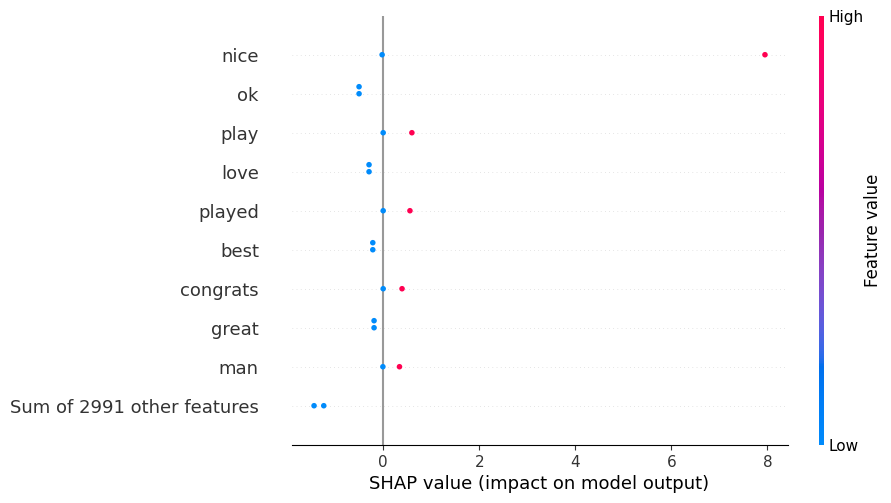

In [340]:
shap_values = explainer(comment_tfidf.toarray())
shap.plots.beeswarm(shap_values)

In [322]:
shap.plots.force(shap_values[0])